In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2, TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
from qiskit.primitives import Sampler
import time

# **Visualization of The dataset using PCA decomposition.**

In [2]:
iris = load_iris()

X, Y = iris['data'], iris['target']

X_scaled = MinMaxScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

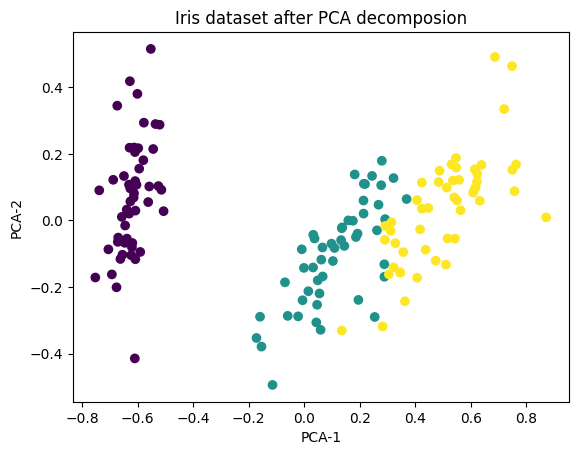

In [3]:
pca = PCA(n_components=2).fit_transform(X_scaled)

plt.scatter(pca[:,0], pca[:,1], c=Y)
plt.title('Iris dataset after PCA decomposion')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.show()

# **Testing VQC of ZZFeatureMap FeatureMap and RealAmplitudes Ansatz**

In [4]:
MAXITR = 100
num_qubits = X.shape[1]
opt = COBYLA(maxiter=MAXITR)

In [5]:
featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)

/home/gzuz/.local/lib/python3.8/site-packages/qiskit/visualization/circuit/matplotlib.py:266: UserWarning: Style JSON file 'ixq.json' not found in any of these locations: /home/gzuz/.local/lib/python3.8/site-packages/qiskit/visualization/circuit/styles/ixq.json, ixq.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


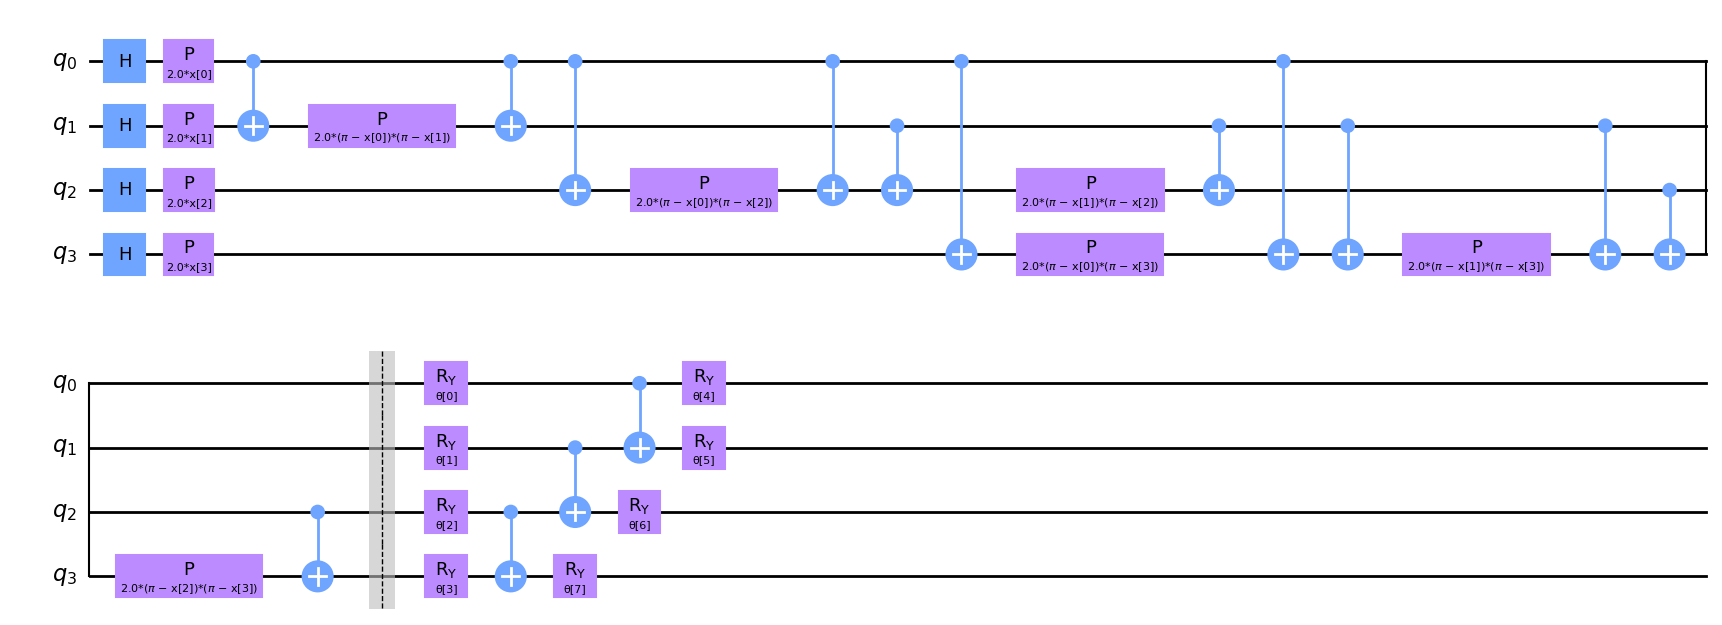

In [6]:
qc = QuantumCircuit(num_qubits)
qc.compose(featuremap, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)
qc.decompose().draw(output='mpl', style='ixq')

In [26]:
objective_func_vals = []

def callback_graph(weights, obj_func_eval):
  clear_output(wait=True)
  objective_func_vals.append(obj_func_eval)
  plt.title("Objective function value against iteration")
  plt.xlabel("Iteration")
  plt.ylabel("Objective function value")
  plt.plot(range(len(objective_func_vals)), objective_func_vals)
  plt.show()

In [27]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []

In [28]:
vqc = VQC(
    feature_map=featuremap,
    ansatz=ansatz,
    optimizer=opt,
    callback=callback_graph,
)

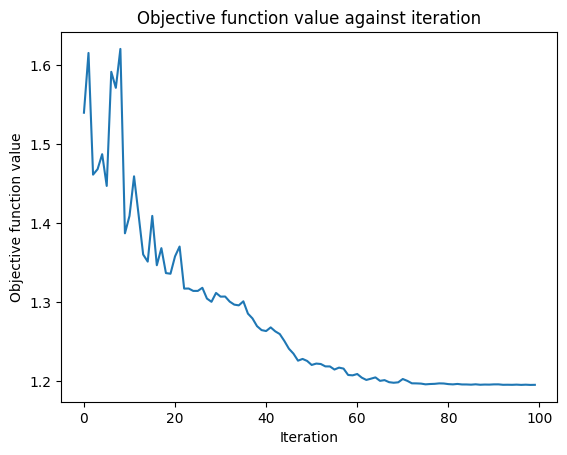

In [29]:
start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

In [30]:
preds = vqc.predict(X_test)
score = vqc.score(X_test, Y_test)
precision = precision_score(Y_test, preds, average='weighted')
accuracy = accuracy_score(Y_test, preds)
recall = recall_score(Y_test, preds, average='macro')
f1 = f1_score(Y_test, preds, average='weighted')

In [31]:
times.append(elapsed)
precisions.append(precision)
accuracies.append(accuracy)
recalls.append(recall)
f1s.append(f1)

In [32]:
print("Time:\n",times)
print("Precision:\n",precisions)
print("Accuracy:\n",accuracies)
print("Recalls:\n",recalls)
print("F1:\n",f1s)

Time:
 [66.56257200241089]
Precision:
 [0.7742424242424242]
Accuracy:
 [0.7666666666666667]
Recalls:
 [0.7622895622895624]
F1:
 [0.7655555555555555]


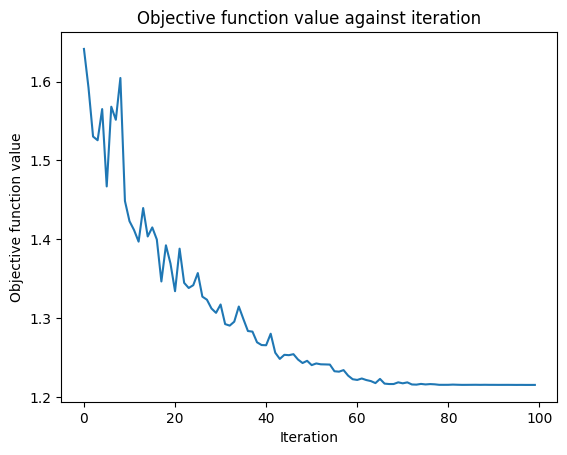

Time:
 [66.56257200241089, 70.58274340629578, 70.8100152015686, 69.84548425674438, 69.60666155815125, 72.19272422790527, 70.9717276096344, 67.38492774963379, 63.87564826011658, 64.16067838668823]
Precision:
 [0.7742424242424242, 0.8143518518518519, 0.7725274725274726, 0.7725274725274726, 0.8025925925925925, 0.7725274725274726, 0.7688888888888888, 0.7412698412698412, 0.7774358974358974, 0.7519117647058824]
Accuracy:
 [0.7666666666666667, 0.7, 0.7666666666666667, 0.7666666666666667, 0.8, 0.7666666666666667, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7]
Recalls:
 [0.7622895622895624, 0.7138047138047138, 0.7585858585858586, 0.7585858585858586, 0.7956228956228957, 0.7585858585858586, 0.7313131313131315, 0.7252525252525253, 0.7343434343434344, 0.7138047138047138]
F1:
 [0.7655555555555555, 0.6807096171802055, 0.7638888888888888, 0.7638888888888888, 0.7999999999999999, 0.7638888888888888, 0.7406698564593301, 0.728859649122807, 0.7355284346131028, 0.6773057371096587]


In [33]:
for i in range(9):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)


**Precision:**
 [0.7742424242424242, 0.8143518518518519, 0.7725274725274726, 0.7725274725274726, 0.8025925925925925, 0.7725274725274726, 0.7688888888888888, 0.7412698412698412, 0.7774358974358974, 0.7519117647058824]
**Mean Precision**
0.7748275678569796±0.02


**Accuracy:**
 [0.7666666666666667, 0.7, 0.7666666666666667, 0.7666666666666667, 0.8, 0.7666666666666667, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7]
**Mean Accuracy:**
0.7466666666666667±0.03

**Recall:**
 [0.7622895622895624, 0.7138047138047138, 0.7585858585858586, 0.7585858585858586, 0.7956228956228957, 0.7585858585858586, 0.7313131313131315, 0.7252525252525253, 0.7343434343434344, 0.7138047138047138]
**Mean Recall:**
0.7452188552188552±0.0246

**F1:**
 [0.7655555555555555, 0.6807096171802055, 0.7638888888888888, 0.7638888888888888, 0.7999999999999999, 0.7638888888888888, 0.7406698564593301, 0.728859649122807, 0.7355284346131028, 0.6773057371096587]
**Mean F1:**
0.7420295516707327±0.037

**Time:**
 [66.56257200241089, 70.58274340629578, 70.8100152015686, 69.84548425674438, 69.60666155815125, 72.19272422790527, 70.9717276096344, 67.38492774963379, 63.87564826011658, 64.16067838668823]
**Mean Time**
68.59931826591492±2.785092114900759



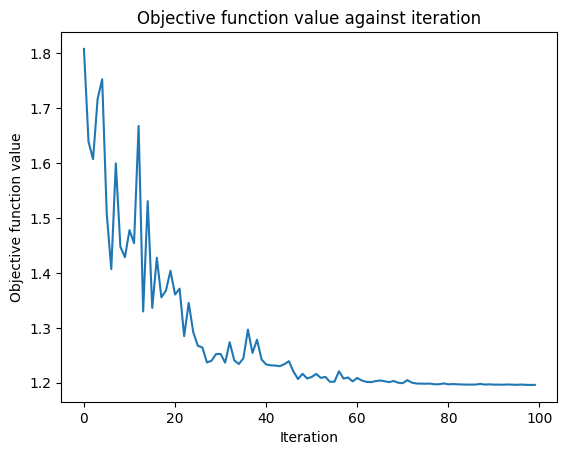

Precision:
 [0.7888888888888889, 0.8996969696969698, 0.7333333333333333, 0.8703703703703705, 0.704871794871795, 0.819047619047619, 0.8143939393939393, 0.8380952380952381, 0.8703703703703705, 0.7523809523809523]
Accuracy:
 [0.7666666666666667, 0.9, 0.7333333333333333, 0.8666666666666667, 0.6666666666666666, 0.8, 0.7666666666666667, 0.7666666666666667, 0.8666666666666667, 0.7333333333333333]
Recalls:
 [0.7683501683501683, 0.9023569023569024, 0.7447811447811447, 0.872053872053872, 0.6804713804713804, 0.8114478114478114, 0.7713804713804714, 0.7781144781144781, 0.872053872053872, 0.7373737373737373]
F1:
 [0.7715909090909091, 0.8984126984126986, 0.729090909090909, 0.863030303030303, 0.646969696969697, 0.7888888888888889, 0.7708994708994709, 0.7675191815856778, 0.863030303030303, 0.7222222222222221]
Time:
 [69.93372702598572, 61.62317371368408, 55.63222575187683, 55.72345304489136, 54.843199014663696, 53.92969560623169, 55.118656158447266, 55.74837136268616, 55.35867190361023, 55.534770250320

In [34]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)



**Precision:**
 [0.7888888888888889, 0.8996969696969698, 0.7333333333333333, 0.8703703703703705, 0.704871794871795, 0.819047619047619, 0.8143939393939393, 0.8380952380952381, 0.8703703703703705, 0.7523809523809523]
**Mean Precision**
0.8091449476449476±0.06

**Accuracy:**
 [0.7666666666666667, 0.9, 0.7333333333333333, 0.8666666666666667, 0.6666666666666666, 0.8, 0.7666666666666667, 0.7666666666666667, 0.8666666666666667, 0.7333333333333333]
**Mean Accuracy:**
0.7866666666666666±0.069

**Recall:**
 [0.7683501683501683, 0.9023569023569024, 0.7447811447811447, 0.872053872053872, 0.6804713804713804, 0.8114478114478114, 0.7713804713804714, 0.7781144781144781, 0.872053872053872, 0.7373737373737373]
**Mean Recall:**
0.7938383838383837±0.0665

**F1:**
 [0.7715909090909091, 0.8984126984126986, 0.729090909090909, 0.863030303030303, 0.646969696969697, 0.7888888888888889, 0.7708994708994709, 0.7675191815856778, 0.863030303030303, 0.7222222222222221]
**Mean F1**
0.7420295516707327±0.037

**Time:**
 [69.93372702598572, 61.62317371368408, 55.63222575187683, 55.72345304489136, 54.843199014663696, 53.92969560623169, 55.118656158447266, 55.74837136268616, 55.35867190361023, 55.534770250320435]
**Mean Time**
57.344594383239745±4.6367380797109154




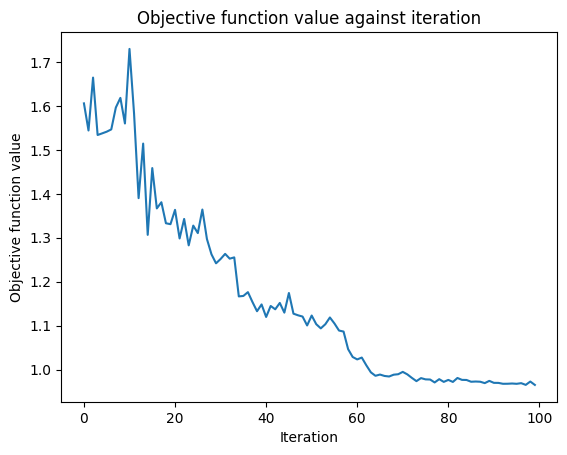

Precision:
 [0.8038105413105413, 0.8855769230769232, 0.9230769230769231, 0.7416666666666667, 0.8897435897435898, 0.8855769230769232, 0.9111111111111112, 0.85, 0.865530303030303, 0.9121212121212121]
Accuracy:
 [0.8, 0.8666666666666667, 0.9, 0.6666666666666666, 0.8666666666666667, 0.8666666666666667, 0.9, 0.8333333333333334, 0.8666666666666667, 0.9]
Recalls:
 [0.7956228956228957, 0.8653198653198654, 0.9023569023569024, 0.67003367003367, 0.872053872053872, 0.8653198653198654, 0.9023569023569024, 0.8319865319865319, 0.8653198653198654, 0.9060606060606061]
F1:
 [0.7982284141726865, 0.86691389599318, 0.9022080136402387, 0.6522435897435898, 0.8652936689549963, 0.86691389599318, 0.8996969696969698, 0.8352272727272728, 0.8645191409897293, 0.9]
Time:
 [60.19067358970642, 60.928030014038086, 61.18477392196655, 52.18880915641785, 46.61422562599182, 46.44520831108093, 46.49558162689209, 46.169156074523926, 46.00507569313049, 46.55289316177368]


In [35]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)


**Precision:**
 [0.8038105413105413, 0.8855769230769232, 0.9230769230769231, 0.7416666666666667, 0.8897435897435898, 0.8855769230769232, 0.9111111111111112, 0.85, 0.865530303030303, 0.9121212121212121]
**Mean Precision**
0.8668214193214194±0.053

**Accuracy:**
 [0.8, 0.8666666666666667, 0.9, 0.6666666666666666, 0.8666666666666667, 0.8666666666666667, 0.9, 0.8333333333333334, 0.8666666666666667, 0.9]
**Mean Accuracy**
0.8466666666666667±0.067

**Recall:**
 [0.7956228956228957, 0.8653198653198654, 0.9023569023569024, 0.67003367003367, 0.872053872053872, 0.8653198653198654, 0.9023569023569024, 0.8319865319865319, 0.8653198653198654, 0.9060606060606061]
**Mean Recall**
0.8476430976430975±0.067

**F1:**
 [0.7982284141726865, 0.86691389599318, 0.9022080136402387, 0.6522435897435898, 0.8652936689549963, 0.86691389599318, 0.8996969696969698, 0.8352272727272728, 0.8645191409897293, 0.9]
**Mean F1**
0.8451244861911844±0.07104980578755521

**Time:**
 [60.19067358970642, 60.928030014038086, 61.18477392196655, 52.18880915641785, 46.61422562599182, 46.44520831108093, 46.49558162689209, 46.169156074523926, 46.00507569313049, 46.55289316177368]
**Mean Time**
51.277442717552184±6.44780128099729


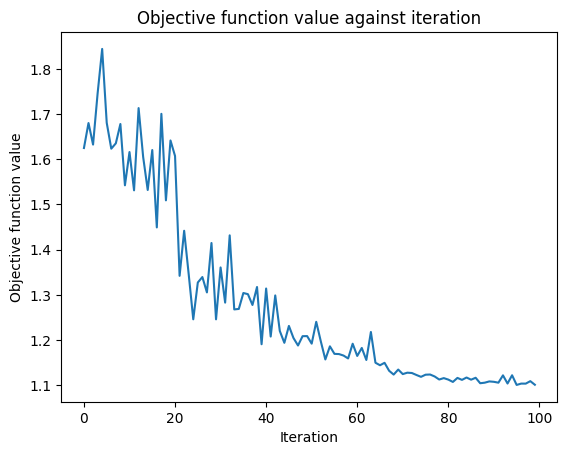

Precision:
 [0.7977272727272726, 0.6666666666666666, 0.7534920634920635, 0.7982154882154883, 0.8058333333333334, 0.8033333333333333, 0.9013888888888889, 0.8062962962962963, 0.9121212121212121, 0.83517316017316]
Accuracy:
 [0.8, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8, 0.8, 0.9, 0.8, 0.9, 0.8333333333333334]
Recalls:
 [0.794949494949495, 0.6707070707070707, 0.7356902356902357, 0.8047138047138046, 0.8016835016835017, 0.8016835016835017, 0.8956228956228957, 0.7986531986531987, 0.9060606060606061, 0.8282828282828283]
F1:
 [0.7974789915966388, 0.6656641604010025, 0.7249649122807018, 0.7951796157059315, 0.7991511756217639, 0.8004177109440267, 0.89923273657289, 0.8017543859649123, 0.9, 0.829416839199448]
Time:
 [50.38809585571289, 50.08720111846924, 51.57299590110779, 50.65134572982788, 50.41527032852173, 50.47921872138977, 50.5826153755188, 50.86072587966919, 50.740474224090576, 51.58808517456055]


In [36]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=4)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)


**Precision:**
 [0.7977272727272726, 0.6666666666666666, 0.7534920634920635, 0.7982154882154883, 0.8058333333333334, 0.8033333333333333, 0.9013888888888889, 0.8062962962962963, 0.9121212121212121, 0.83517316017316]
**Mean Precision**
0.8080247715247715±0.066

**Accuracy:**
 [0.8, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8, 0.8, 0.9, 0.8, 0.9, 0.8333333333333334]
**Mean Accuracy**
0.8033333333333335±0.066


**Recall:**
 [0.794949494949495, 0.6707070707070707, 0.7356902356902357, 0.8047138047138046, 0.8016835016835017, 0.8016835016835017, 0.8956228956228957, 0.7986531986531987, 0.9060606060606061, 0.8282828282828283]
**Mean Recall**
0.8038047138047139±0.065

**F1:**
 [0.7974789915966388, 0.6656641604010025, 0.7249649122807018, 0.7951796157059315, 0.7991511756217639, 0.8004177109440267, 0.89923273657289, 0.8017543859649123, 0.9, 0.829416839199448]
**Mean F1**
0.8013260528287315±0.067
**Time:**
 [50.38809585571289, 50.08720111846924, 51.57299590110779, 50.65134572982788, 50.41527032852173, 50.47921872138977, 50.5826153755188, 50.86072587966919, 50.740474224090576, 51.58808517456055]
**Mean Time**
50.73660283088684±0.46729635466707753


# **Testing VQC of ZZFeatureMap FeatureMap and TwoLocal Ansatz**

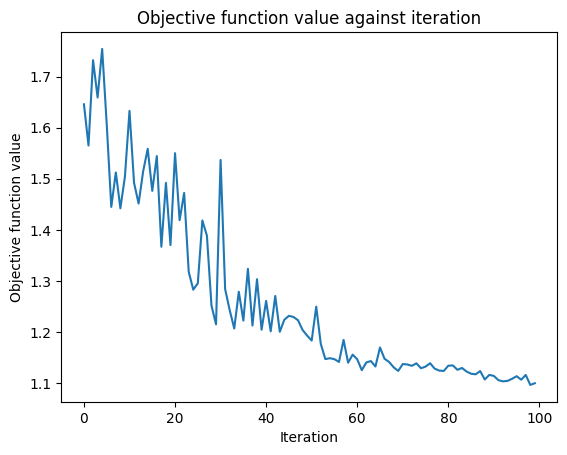

Precision:
 [0.8201465201465202, 0.8185185185185185, 0.7944444444444445, 0.834920634920635, 0.8842592592592593, 0.8544444444444445, 0.9033333333333334, 0.8564102564102565, 0.8774410774410775, 0.8713804713804713]
Accuracy:
 [0.7666666666666667, 0.8, 0.7666666666666667, 0.8333333333333334, 0.8666666666666667, 0.8333333333333334, 0.9, 0.8333333333333334, 0.8666666666666667, 0.8666666666666667]
Recalls:
 [0.7474747474747474, 0.8084175084175084, 0.7811447811447811, 0.8282828282828283, 0.8757575757575756, 0.8350168350168351, 0.9023569023569024, 0.8350168350168351, 0.872053872053872, 0.8757575757575756]
F1:
 [0.7333333333333333, 0.801027568922306, 0.7490196078431371, 0.828030303030303, 0.866265664160401, 0.8328548644338117, 0.9002506265664162, 0.8319603356216629, 0.8666666666666667, 0.8633333333333333]
Time:
 [44.59488654136658, 44.959097146987915, 45.13655686378479, 44.84427857398987, 45.00880241394043, 45.22632431983948, 45.15762257575989, 44.51168394088745, 45.331968545913696, 44.952611446

In [48]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=1, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)


**Precision:**
 [0.8201465201465202, 0.8185185185185185, 0.7944444444444445, 0.834920634920635, 0.8842592592592593, 0.8544444444444445, 0.9033333333333334, 0.8564102564102565, 0.8774410774410775, 0.8713804713804713]
**Mean Precision**
0.8515298960298961±0.032

**Accuracy:**
 [0.7666666666666667, 0.8, 0.7666666666666667, 0.8333333333333334, 0.8666666666666667, 0.8333333333333334, 0.9, 0.8333333333333334, 0.8666666666666667, 0.8666666666666667]
**Mean Accuracy**
0.8333333333333334±0.042

**Recall:**
 [0.7474747474747474, 0.8084175084175084, 0.7811447811447811, 0.8282828282828283, 0.8757575757575756, 0.8350168350168351, 0.9023569023569024, 0.8350168350168351, 0.872053872053872, 0.8757575757575756]
**Mean Recall**
0.836127946127946±0.045

**F1:**
 [0.7333333333333333, 0.801027568922306, 0.7490196078431371, 0.828030303030303, 0.866265664160401, 0.8328548644338117, 0.9002506265664162, 0.8319603356216629, 0.8666666666666667, 0.8633333333333333]
**Mean F1**
0.8272742303911371±0.05
 
**Time:**
 [44.59488654136658, 44.959097146987915, 45.13655686378479, 44.84427857398987, 45.00880241394043, 45.22632431983948, 45.15762257575989, 44.51168394088745, 45.331968545913696, 44.952611446380615]
**Mean Time**
44.97238323688507±0.25062052229913884



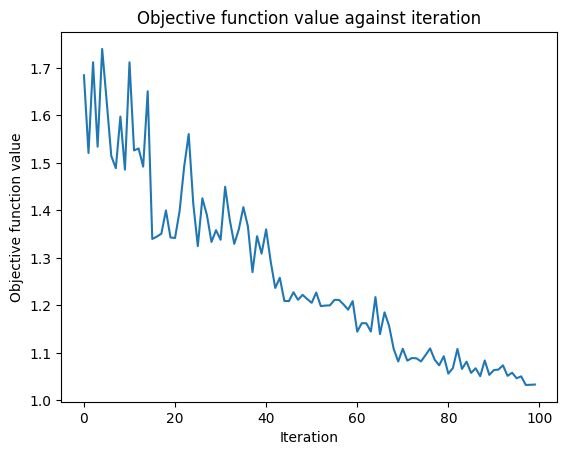

Precision:
 [0.9363636363636363, 0.9396969696969696, 0.9033333333333334, 0.8733333333333333, 0.9033333333333334, 0.75, 0.9333333333333333, 0.7596969696969696, 0.8672619047619048, 0.8441077441077441]
Accuracy:
 [0.9333333333333333, 0.9333333333333333, 0.9, 0.8666666666666667, 0.9, 0.7333333333333333, 0.9333333333333333, 0.7666666666666667, 0.8333333333333334, 0.8333333333333334]
Recalls:
 [0.9326599326599326, 0.9393939393939394, 0.9023569023569024, 0.869023569023569, 0.9023569023569024, 0.741077441077441, 0.9326599326599326, 0.7676767676767676, 0.8350168350168351, 0.8387205387205388]
F1:
 [0.9333333333333333, 0.931670843776107, 0.9002506265664162, 0.868421052631579, 0.9002506265664162, 0.731578947368421, 0.9333333333333333, 0.761904761904762, 0.8336085311317508, 0.8333333333333334]
Time:
 [54.210657358169556, 53.883872270584106, 54.13293099403381, 54.20532202720642, 53.9370801448822, 53.41452622413635, 53.44713091850281, 54.04611349105835, 53.71177005767822, 54.0597984790802]


In [38]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)


**Precision:**
 [0.9363636363636363, 0.9396969696969696, 0.9033333333333334, 0.8733333333333333, 0.9033333333333334, 0.75, 0.9333333333333333, 0.7596969696969696, 0.8672619047619048, 0.8441077441077441]
**Mean Precision**
0.8710460557960558±0.065

**Accuracy:**
 [0.9333333333333333, 0.9333333333333333, 0.9, 0.8666666666666667, 0.9, 0.7333333333333333, 0.9333333333333333, 0.7666666666666667, 0.8333333333333334, 0.8333333333333334]
**Mean Accuracy**
0.8633333333333333±0.067

**Recall:**
 [0.9326599326599326, 0.9393939393939394, 0.9023569023569024, 0.869023569023569, 0.9023569023569024, 0.741077441077441, 0.9326599326599326, 0.7676767676767676, 0.8350168350168351, 0.8387205387205388]
**Mean Recall**
0.866094276094276±0.066

**F1:**
 [0.9333333333333333, 0.931670843776107, 0.9002506265664162, 0.868421052631579, 0.9002506265664162, 0.731578947368421, 0.9333333333333333, 0.761904761904762, 0.8336085311317508, 0.8333333333333334]
**Mean F1**
0.8627685389945452±0.068

**Time:**
 [54.210657358169556, 53.883872270584106, 54.13293099403381, 54.20532202720642, 53.9370801448822, 53.41452622413635, 53.44713091850281, 54.04611349105835, 53.71177005767822, 54.0597984790802]
**Mean Time**
53.904920196533205±0.27721286934858047



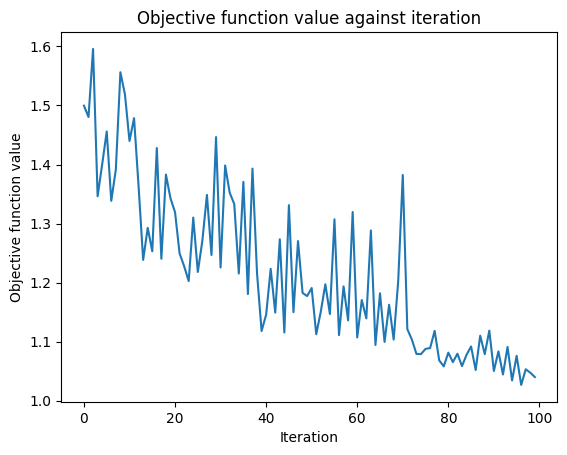

Precision:
 [0.9085858585858586, 0.8897435897435898, 0.9333333333333333, 0.837037037037037, 0.9700000000000001, 0.9151515151515152, 0.8855769230769232, 0.9444444444444445, 0.939141414141414, 0.9694444444444444]
Accuracy:
 [0.9, 0.8666666666666667, 0.9333333333333333, 0.8333333333333334, 0.9666666666666667, 0.9, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667]
Recalls:
 [0.8956228956228957, 0.8585858585858586, 0.9326599326599326, 0.8350168350168351, 0.9696969696969697, 0.9090909090909092, 0.8653198653198654, 0.9326599326599326, 0.9259259259259259, 0.9629629629629629]
F1:
 [0.8988008971704624, 0.8631884057971015, 0.9333333333333333, 0.8296969696969697, 0.966750208855472, 0.8962322472848788, 0.86691389599318, 0.9345895934131228, 0.9306849551414769, 0.9664109121909632]
Time:
 [62.173508167266846, 62.279075622558594, 86.4977719783783, 108.60936713218689, 102.58006286621094, 99.35063433647156, 98.47975254058838, 80.20636653900146, 79.88814616203308, 80.26099777

In [39]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)


**Precision:**
 [0.9085858585858586, 0.8897435897435898, 0.9333333333333333, 0.837037037037037, 0.9700000000000001, 0.9151515151515152, 0.8855769230769232, 0.9444444444444445, 0.939141414141414, 0.9694444444444444]
**Mean Precision**
 0.9192458559958562±0.039

**Accuracy:**
 [0.9, 0.8666666666666667, 0.9333333333333333, 0.8333333333333334, 0.9666666666666667, 0.9, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667]
**Mean Accuracy**
0.9099999999999999±0.042

**Recall:**
 [0.8956228956228957, 0.8585858585858586, 0.9326599326599326, 0.8350168350168351, 0.9696969696969697, 0.9090909090909092, 0.8653198653198654, 0.9326599326599326, 0.9259259259259259, 0.9629629629629629]
**Mean Recall**
0.9087542087542089±0.0425

**F1:**
 [0.8988008971704624, 0.8631884057971015, 0.9333333333333333, 0.8296969696969697, 0.966750208855472, 0.8962322472848788, 0.86691389599318, 0.9345895934131228, 0.9306849551414769, 0.9664109121909632]
**Mean F1**
0.908660141887696±0.0433

**Time:**
 [62.173508167266846, 62.279075622558594, 86.4977719783783, 108.60936713218689, 102.58006286621094, 99.35063433647156, 98.47975254058838, 80.20636653900146, 79.88814616203308, 80.2609977722168]
**Mean Time**
86.03256831169128±15.344522985034029
 


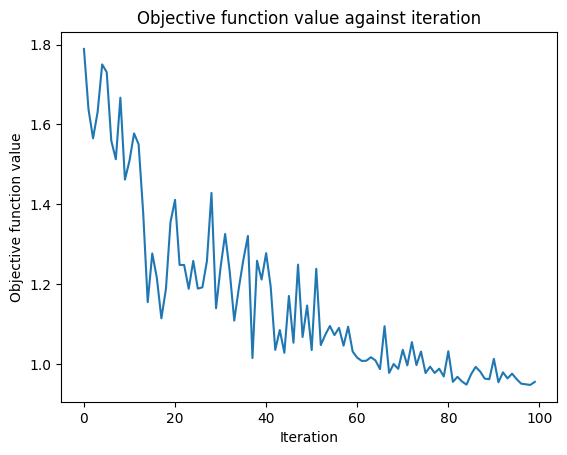

Precision:
 [0.9363636363636363, 0.8996969696969698, 0.6705128205128206, 0.9696969696969696, 0.9361111111111111, 0.8173160173160172, 0.9700000000000001, 0.8630769230769231, 0.7615384615384616, 0.9144444444444445]
Accuracy:
 [0.9333333333333333, 0.9, 0.5666666666666667, 0.9666666666666667, 0.9333333333333333, 0.8, 0.9666666666666667, 0.8333333333333334, 0.6666666666666666, 0.9]
Recalls:
 [0.9326599326599326, 0.9023569023569024, 0.5737373737373738, 0.9696969696969697, 0.9296296296296296, 0.8114478114478114, 0.9696969696969697, 0.8417508417508417, 0.6767676767676768, 0.9090909090909092]
F1:
 [0.9331465919701214, 0.8984126984126986, 0.574508281573499, 0.9666666666666667, 0.9331807780320366, 0.7904761904761904, 0.966750208855472, 0.8276718365963217, 0.6490469916556874, 0.8960127591706539]
Time:
 [90.98361325263977, 91.37946343421936, 91.3833520412445, 95.7776460647583, 97.4669578075409, 101.52251052856445, 75.88850355148315, 70.43185663223267, 69.19590926170349, 75.08839178085327]


In [40]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=4, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)


**Precision:**
 [0.9363636363636363, 0.8996969696969698, 0.6705128205128206, 0.9696969696969696, 0.9361111111111111, 0.8173160173160172, 0.9700000000000001, 0.8630769230769231, 0.7615384615384616, 0.9144444444444445]
**Mean Precision**
 0.8738757353757354±0.092

**Accuracy:**
 [0.9333333333333333, 0.9, 0.5666666666666667, 0.9666666666666667, 0.9333333333333333, 0.8, 0.9666666666666667, 0.8333333333333334, 0.6666666666666666, 0.9]
**Mean Accuracy**
0.8466666666666667±0.127

**Recall:**
 [0.9326599326599326, 0.9023569023569024, 0.5737373737373738, 0.9696969696969697, 0.9296296296296296, 0.8114478114478114, 0.9696969696969697, 0.8417508417508417, 0.6767676767676768, 0.9090909090909092]
**Mean Recall**
0.8516835016835017±0.125

**F1:**
 [0.9331465919701214, 0.8984126984126986, 0.574508281573499, 0.9666666666666667, 0.9331807780320366, 0.7904761904761904, 0.966750208855472, 0.8276718365963217, 0.6490469916556874, 0.8960127591706539]
**Mean F1**
 0.8435873003409349±0.129

**Time:**
 [90.98361325263977, 91.37946343421936, 91.3833520412445, 95.7776460647583, 97.4669578075409, 101.52251052856445, 75.88850355148315, 70.43185663223267, 69.19590926170349, 75.08839178085327]
**Mean Time**
85.91182043552399±11.387579530303311

 


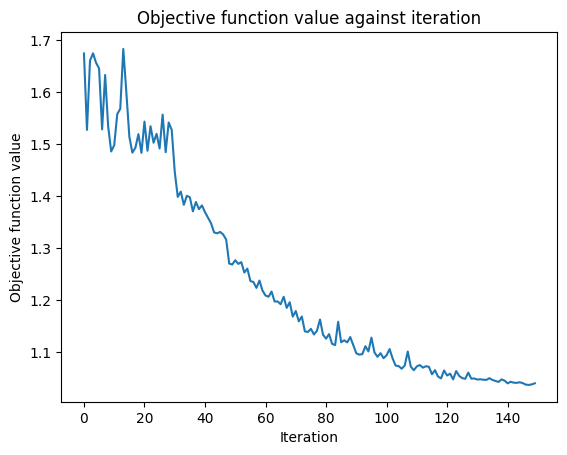

Precision:
 [0.8117424242424243, 0.9076923076923077, 0.834920634920635, 0.8208333333333333, 0.9013888888888889, 0.9333333333333333, 0.9033333333333334, 0.9333333333333333, 0.9096969696969697, 0.8185185185185185]
Accuracy:
 [0.8, 0.8666666666666667, 0.8333333333333334, 0.8, 0.9, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9, 0.8]
Recalls:
 [0.8084175084175084, 0.8787878787878788, 0.8282828282828283, 0.8084175084175084, 0.8956228956228957, 0.9326599326599326, 0.9023569023569024, 0.9326599326599326, 0.9023569023569024, 0.8084175084175084]
F1:
 [0.795889724310777, 0.863973063973064, 0.828030303030303, 0.7987468671679198, 0.89923273657289, 0.9333333333333333, 0.9002506265664162, 0.9333333333333333, 0.9000918964076859, 0.801027568922306]
Time:
 [86.60657835006714, 87.43600845336914, 89.65518283843994, 88.20548510551453, 89.54974269866943, 88.60578560829163, 89.357253074646, 88.58420181274414, 89.22101879119873, 87.35461163520813]


In [41]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)

  MAXITR = 150
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=1, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)


**Precision:**
 [0.8117424242424243, 0.9076923076923077, 0.834920634920635, 0.8208333333333333, 0.9013888888888889, 0.9333333333333333, 0.9033333333333334, 0.9333333333333333, 0.9096969696969697, 0.8185185185185185]
**Mean Precision**
0.8774793077293077±0.047

**Accuracy:**
 [0.8, 0.8666666666666667, 0.8333333333333334, 0.8, 0.9, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9, 0.8]
**Mean Accuracy**
0.8666666666666668±0.051

**Recall:**
 [0.8084175084175084, 0.8787878787878788, 0.8282828282828283, 0.8084175084175084, 0.8956228956228957, 0.9326599326599326, 0.9023569023569024, 0.9326599326599326, 0.9023569023569024, 0.8084175084175084]
**Mean Recall**
0.8697979797979798±0.0488

**F1:**
 [0.795889724310777, 0.863973063973064, 0.828030303030303, 0.7987468671679198, 0.89923273657289, 0.9333333333333333, 0.9002506265664162, 0.9333333333333333, 0.9000918964076859, 0.801027568922306]
**Mean F1**
0.8653909453618027±0.0525

**Time:**
 [86.60657835006714, 87.43600845336914, 89.65518283843994, 88.20548510551453, 89.54974269866943, 88.60578560829163, 89.357253074646, 88.58420181274414, 89.22101879119873, 87.35461163520813]
**Mean Time**
88.45758683681488±0.99031444076999



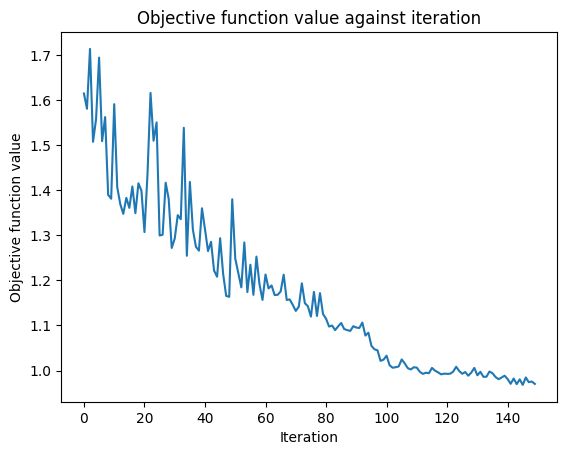

Precision:
 [0.9111111111111112, 0.9694444444444444, 0.9333333333333333, 0.9454545454545454, 0.9055555555555556, 0.8296969696969697, 1.0, 0.8595238095238095, 0.9076923076923077, 0.8333333333333334]
Accuracy:
 [0.9, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9, 0.8333333333333334, 1.0, 0.8, 0.8666666666666667, 0.8333333333333334]
Recalls:
 [0.9023569023569024, 0.9629629629629629, 0.9326599326599326, 0.9393939393939394, 0.8993265993265993, 0.8350168350168351, 1.0, 0.8030303030303031, 0.8787878787878788, 0.8282828282828283]
F1:
 [0.8996969696969698, 0.9664109121909632, 0.9333333333333333, 0.9333333333333333, 0.9012967200610221, 0.8301587301587302, 1.0, 0.7903381642512077, 0.863973063973064, 0.8320545609548167]
Time:
 [82.50979900360107, 79.69241976737976, 80.55432534217834, 80.41987109184265, 81.07120633125305, 79.80186176300049, 79.24395322799683, 79.38226199150085, 79.7204978466034, 80.376638174057]


In [42]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)

  MAXITR = 150
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9111111111111112, 0.9694444444444444, 0.9333333333333333, 0.9454545454545454, 0.9055555555555556, 0.8296969696969697, 1.0, 0.8595238095238095, 0.9076923076923077, 0.8333333333333334]
**Mean Precision**
 0.9095145410145411±0.053

**Accuracy:**
 [0.9, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9, 0.8333333333333334, 1.0, 0.8, 0.8666666666666667, 0.8333333333333334]
**Mean Accuracy**
 0.8966666666666667±0.06

**Recall:**
 [0.9023569023569024, 0.9629629629629629, 0.9326599326599326, 0.9393939393939394, 0.8993265993265993, 0.8350168350168351, 1.0, 0.8030303030303031, 0.8787878787878788, 0.8282828282828283]
**Mean Recall**
0.8981818181818182±0.06
 
**F1:**
 [0.8996969696969698, 0.9664109121909632, 0.9333333333333333, 0.9333333333333333, 0.9012967200610221, 0.8301587301587302, 1.0, 0.7903381642512077, 0.863973063973064, 0.8320545609548167]
**Mean F1**
0.8950595787953441±0.063

**Time:**
 [82.50979900360107, 79.69241976737976, 80.55432534217834, 80.41987109184265, 81.07120633125305, 79.80186176300049, 79.24395322799683, 79.38226199150085, 79.7204978466034, 80.376638174057]
**Mean Time**
80.27728345394135±0.9202353133853681



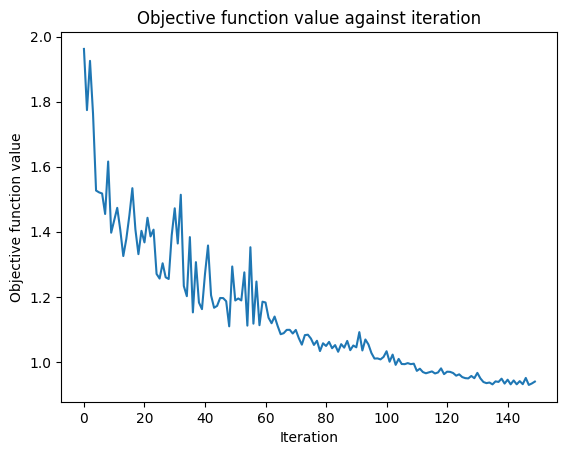

Precision:
 [0.8106959706959707, 0.9096969696969697, 0.9111111111111112, 0.865530303030303, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8703703703703705, 0.9454545454545454, 0.9033333333333334]
Accuracy:
 [0.8, 0.9, 0.9, 0.8666666666666667, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8666666666666667, 0.9333333333333333, 0.9]
Recalls:
 [0.8114478114478114, 0.9023569023569024, 0.9023569023569024, 0.8653198653198654, 0.9326599326599326, 0.8653198653198654, 1.0, 0.872053872053872, 0.9393939393939394, 0.9023569023569024]
F1:
 [0.786931095855581, 0.9000918964076859, 0.8996969696969698, 0.8645191409897293, 0.9333333333333333, 0.8666666666666667, 1.0, 0.863030303030303, 0.9333333333333333, 0.9002506265664162]
Time:
 [91.35236597061157, 92.0054726600647, 92.43176174163818, 91.1609239578247, 91.61616539955139, 91.9480152130127, 91.28360414505005, 91.862229347229, 90.63079619407654, 90.69785046577454]


In [43]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)

  MAXITR = 150
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)


**Precision:**
 [0.8106959706959707, 0.9096969696969697, 0.9111111111111112, 0.865530303030303, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8703703703703705, 0.9454545454545454, 0.9033333333333334]
**Mean Precision**
0.9016192603692605±0.05

**Accuracy:**
 [0.8, 0.9, 0.9, 0.8666666666666667, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8666666666666667, 0.9333333333333333, 0.9]
**Mean Accuracy**
0.8966666666666667±0.05

**Recall:**
 [0.8114478114478114, 0.9023569023569024, 0.9023569023569024, 0.8653198653198654, 0.9326599326599326, 0.8653198653198654, 1.0, 0.872053872053872, 0.9393939393939394, 0.9023569023569024]
**Mean Recall**
0.8993265993265993±0.049

**F1:**
 [0.786931095855581, 0.9000918964076859, 0.8996969696969698, 0.8645191409897293, 0.9333333333333333, 0.8666666666666667, 1.0, 0.863030303030303, 0.9333333333333333, 0.9002506265664162]
**Mean F1**
0.8947853365880019±0.053
 
**Time:**
 [91.35236597061157, 92.0054726600647, 92.43176174163818, 91.1609239578247, 91.61616539955139, 91.9480152130127, 91.28360414505005, 91.862229347229, 90.63079619407654, 90.69785046577454]
**Mean Time**
91.49891850948333±0.5524172023673798




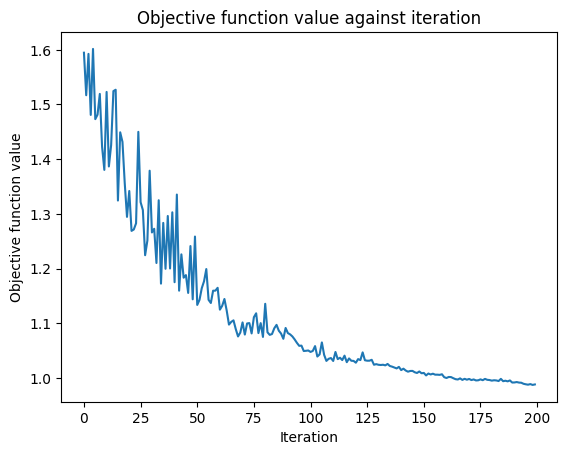

Precision:
 [0.9396969696969696, 0.9033333333333334, 0.9151515151515152, 0.8689562289562289, 0.8703703703703705, 0.9033333333333334, 0.9454545454545454, 0.8996969696969698, 1.0, 0.9444444444444445]
Accuracy:
 [0.9333333333333333, 0.9, 0.9, 0.8666666666666667, 0.8666666666666667, 0.9, 0.9333333333333333, 0.9, 1.0, 0.9333333333333333]
Recalls:
 [0.9393939393939394, 0.9023569023569024, 0.9090909090909092, 0.872053872053872, 0.872053872053872, 0.9023569023569024, 0.9393939393939394, 0.9023569023569024, 1.0, 0.9326599326599326]
F1:
 [0.931670843776107, 0.9002506265664162, 0.8962322472848788, 0.8634252297410192, 0.863030303030303, 0.9002506265664162, 0.9333333333333333, 0.8984126984126986, 1.0, 0.9345895934131228]
Time:
 [105.08695650100708, 107.26876163482666, 105.90548276901245, 107.14311718940735, 107.19193291664124, 105.748939037323, 105.8231143951416, 106.2774646282196, 105.54703640937805, 106.58420324325562]


In [44]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)

  MAXITR = 200
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9396969696969696, 0.9033333333333334, 0.9151515151515152, 0.8689562289562289, 0.8703703703703705, 0.9033333333333334, 0.9454545454545454, 0.8996969696969698, 1.0, 0.9444444444444445]
**Mean Precision**
0.9190437710437711±0.0375

**Accuracy:**
 [0.9333333333333333, 0.9, 0.9, 0.8666666666666667, 0.8666666666666667, 0.9, 0.9333333333333333, 0.9, 1.0, 0.9333333333333333]
**Mean Accuracy**
0.9133333333333333±0.037

**Recall:**
 [0.9393939393939394, 0.9023569023569024, 0.9090909090909092, 0.872053872053872, 0.872053872053872, 0.9023569023569024, 0.9393939393939394, 0.9023569023569024, 1.0, 0.9326599326599326]
**Mean Recall**
0.9171717171717171±0.0359

**F1:**
 [0.931670843776107, 0.9002506265664162, 0.8962322472848788, 0.8634252297410192, 0.863030303030303, 0.9002506265664162, 0.9333333333333333, 0.8984126984126986, 1.0, 0.9345895934131228]
**Mean F1**
0.9121195502124294±0.038
 
**Time:**
 [105.08695650100708, 107.26876163482666, 105.90548276901245, 107.14311718940735, 107.19193291664124, 105.748939037323, 105.8231143951416, 106.2774646282196, 105.54703640937805, 106.58420324325562]
**Mean Time**
106.25770087242127±0.7234250342639803


# **Testing VQC of EfficientSU2 FeatureMap and RealAmplitudes Ansatz**

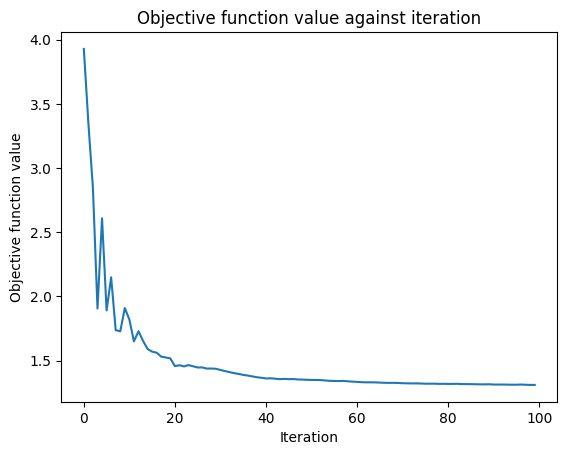

Precision:
 [0.7567765567765569, 0.7567765567765569, 0.5583333333333333, 0.4683333333333334, 0.7567765567765569, 0.45, 0.45, 0.45, 0.45964912280701753, 0.7583333333333333]
Accuracy:
 [0.7333333333333333, 0.7333333333333333, 0.5666666666666667, 0.4666666666666667, 0.7333333333333333, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5333333333333333, 0.7]
Recalls:
 [0.744107744107744, 0.744107744107744, 0.5932659932659933, 0.5, 0.744107744107744, 0.5925925925925926, 0.5925925925925926, 0.5925925925925926, 0.562962962962963, 0.7077441077441078]
F1:
 [0.7279461279461279, 0.7279461279461279, 0.522962962962963, 0.40842911877394633, 0.7279461279461279, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.4677248677248677, 0.7104839393168912]
Time:
 [21.99620747566223, 21.679696083068848, 22.026463270187378, 21.12834882736206, 21.328312158584595, 21.330719709396362, 21.518117427825928, 21.876444578170776, 21.057515382766724, 21.2146475315094]


In [45]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.7567765567765569, 0.7567765567765569, 0.5583333333333333, 0.4683333333333334, 0.7567765567765569, 0.45, 0.45, 0.45, 0.45964912280701753, 0.7583333333333333]
**Mean Precision**
0.5864978793136689±0.14

**Accuracy:**
 [0.7333333333333333, 0.7333333333333333, 0.5666666666666667, 0.4666666666666667, 0.7333333333333333, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5333333333333333, 0.7]
**Mean Accuracy**
0.6166666666666667±0.093

**Recall:**
 [0.744107744107744, 0.744107744107744, 0.5932659932659933, 0.5, 0.744107744107744, 0.5925925925925926, 0.5925925925925926, 0.5925925925925926, 0.562962962962963, 0.7077441077441078]
**Mean Recall**
0.6374074074074074±0.0845

**F1:**
 [0.7279461279461279, 0.7279461279461279, 0.522962962962963, 0.40842911877394633, 0.7279461279461279, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.4677248677248677, 0.7104839393168912]
**Mean F1**
0.5760105939283717±0.12

**Time:**
 [21.99620747566223, 21.679696083068848, 22.026463270187378, 21.12834882736206, 21.328312158584595, 21.330719709396362, 21.518117427825928, 21.876444578170776, 21.057515382766724, 21.2146475315094]
**Mean Time**
21.51564724445343±0.34186873337975104


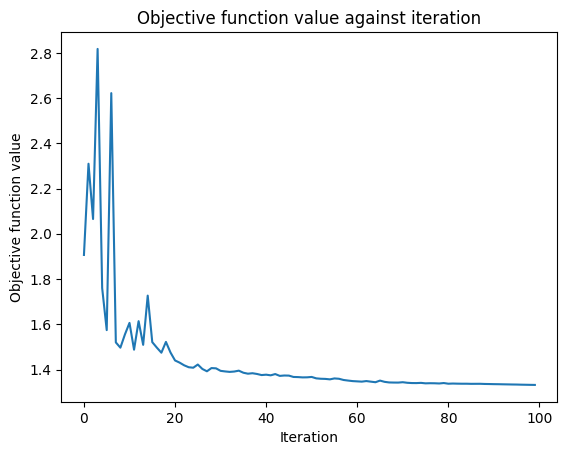

Time:
 [22.756049394607544, 23.868249893188477, 22.705666303634644, 23.627787828445435, 23.6456356048584, 23.85638451576233, 22.78916311264038, 23.099523305892944, 23.654366731643677, 23.619070291519165]
Precision:
 [0.4683333333333334, 0.3925925925925926, 0.45964912280701753, 0.45964912280701753, 0.7932012432012433, 0.4683333333333334, 0.7689393939393939, 0.5667600373482726, 0.7567765567765569, 0.7833333333333333]
Accuracy:
 [0.6333333333333333, 0.5, 0.6, 0.6, 0.7666666666666667, 0.6333333333333333, 0.7666666666666667, 0.5666666666666667, 0.7333333333333333, 0.7666666666666667]
Recalls:
 [0.6666666666666666, 0.5296296296296296, 0.6296296296296297, 0.6296296296296297, 0.7811447811447811, 0.6666666666666666, 0.7744107744107743, 0.593939393939394, 0.744107744107744, 0.7744107744107743]
F1:
 [0.5195402298850574, 0.42339181286549704, 0.5047619047619047, 0.5047619047619047, 0.7513284101519396, 0.5195402298850574, 0.7590392648287385, 0.5292609351432881, 0.7279461279461279, 0.7649122807017543

In [49]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)

**Precision:**
 [0.4683333333333334, 0.3925925925925926, 0.45964912280701753, 0.45964912280701753, 0.7932012432012433, 0.4683333333333334, 0.7689393939393939, 0.5667600373482726, 0.7567765567765569, 0.7833333333333333]
**Mean Precision**
0.5917568069472094±0.155

**Accuracy:**
 [0.6333333333333333, 0.5, 0.6, 0.6, 0.7666666666666667, 0.6333333333333333, 0.7666666666666667, 0.5666666666666667, 0.7333333333333333, 0.7666666666666667]
**Mean Accuracy**
0.6566666666666666±0.09

**Recall:**
 [0.6666666666666666, 0.5296296296296296, 0.6296296296296297, 0.6296296296296297, 0.7811447811447811, 0.6666666666666666, 0.7744107744107743, 0.593939393939394, 0.744107744107744, 0.7744107744107743]
**Mean Recall**
 0.679023569023569±0.082

**F1:**
 [0.5195402298850574, 0.42339181286549704, 0.5047619047619047, 0.5047619047619047, 0.7513284101519396, 0.5195402298850574, 0.7590392648287385, 0.5292609351432881, 0.7279461279461279, 0.7649122807017543]
**Mean F1**
 0.6004483100931269±0.126

 **Time:**
 [22.756049394607544, 23.868249893188477, 22.705666303634644, 23.627787828445435, 23.6456356048584, 23.85638451576233, 22.78916311264038, 23.099523305892944, 23.654366731643677, 23.619070291519165]
**Mean Time**
23.3621896982193±0.4470286995485813


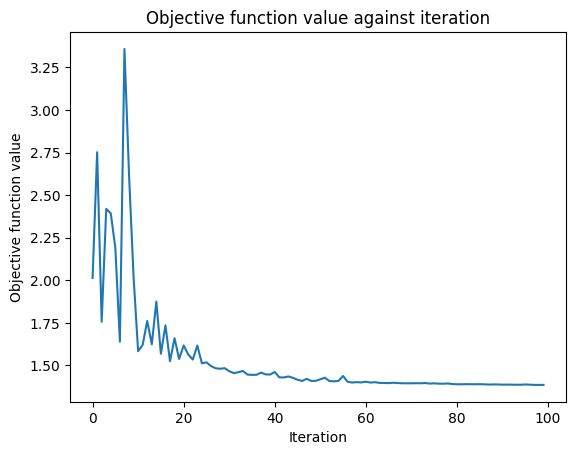

Time:
 [25.789013147354126, 25.433268308639526, 25.03989267349243, 25.6397488117218, 25.121809482574463, 25.098370790481567, 24.777003288269043, 25.56332278251648, 24.73639225959778, 25.676793098449707]
Precision:
 [0.7583333333333333, 0.45964912280701753, 0.45964912280701753, 0.7583333333333333, 0.45964912280701753, 0.4683333333333334, 0.7583333333333333, 0.45964912280701753, 0.45964912280701753, 0.45964912280701753]
Accuracy:
 [0.7, 0.6, 0.6, 0.7, 0.6, 0.6333333333333333, 0.7, 0.6, 0.6, 0.6]
Recalls:
 [0.7077441077441078, 0.6296296296296297, 0.6296296296296297, 0.7077441077441078, 0.6296296296296297, 0.6666666666666666, 0.7077441077441078, 0.6296296296296297, 0.6296296296296297, 0.6296296296296297]
F1:
 [0.7104839393168912, 0.5047619047619047, 0.5047619047619047, 0.7104839393168912, 0.5047619047619047, 0.5195402298850574, 0.7104839393168912, 0.5047619047619047, 0.5047619047619047, 0.5047619047619047]


In [46]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)

**Precision:**
 [0.7583333333333333, 0.45964912280701753, 0.45964912280701753, 0.7583333333333333, 0.45964912280701753, 0.4683333333333334, 0.7583333333333333, 0.45964912280701753, 0.45964912280701753, 0.45964912280701753]
**Mean Precision**
0.5501228070175439±0.136

**Accuracy:**
 [0.7, 0.6, 0.6, 0.7, 0.6, 0.6333333333333333, 0.7, 0.6, 0.6, 0.6]
**Mean Accuracy**
0.6333333333333332±0.045


**Recall:**
 [0.7077441077441078, 0.6296296296296297, 0.6296296296296297, 0.7077441077441078, 0.6296296296296297, 0.6666666666666666, 0.7077441077441078, 0.6296296296296297, 0.6296296296296297, 0.6296296296296297]
**Mean Recall**
0.6567676767676769±0.035

**F1:**
 [0.7104839393168912, 0.5047619047619047, 0.5047619047619047, 0.7104839393168912, 0.5047619047619047, 0.5195402298850574, 0.7104839393168912, 0.5047619047619047, 0.5047619047619047, 0.5047619047619047]
**Mean F1**
 0.567956347640716±0.093

**Time:**
 [25.789013147354126, 25.433268308639526, 25.03989267349243, 25.6397488117218, 25.121809482574463, 25.098370790481567, 24.777003288269043, 25.56332278251648, 24.73639225959778, 25.676793098449707]
**Mean Time**
25.287561464309693±0.36239889293795874



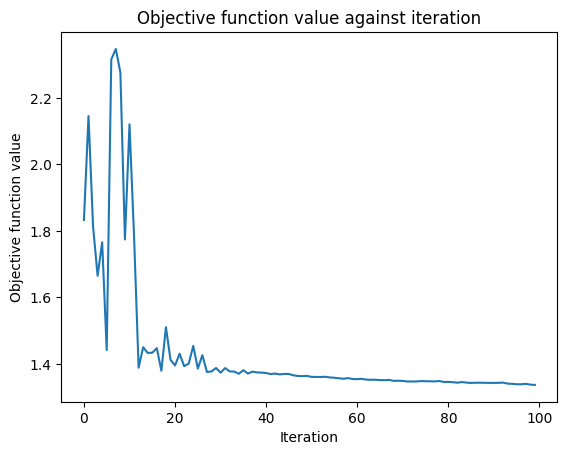

Time:
 [26.74177122116089, 27.020960092544556, 27.207302570343018, 27.02517294883728, 27.25152564048767, 26.827413320541382, 26.64131808280945, 26.52521586418152, 26.726413011550903, 26.03507924079895]
Precision:
 [0.7277777777777777, 0.6933333333333332, 0.45964912280701753, 0.7833333333333333, 0.6479166666666667, 0.7352380952380952, 0.7567765567765569, 0.4683333333333334, 0.7567765567765569, 0.6768627450980392]
Accuracy:
 [0.7, 0.6666666666666666, 0.6, 0.7666666666666667, 0.6333333333333333, 0.6666666666666666, 0.7333333333333333, 0.6333333333333333, 0.7333333333333333, 0.6]
Recalls:
 [0.7138047138047138, 0.6835016835016834, 0.6296296296296297, 0.7744107744107743, 0.6531986531986532, 0.6774410774410775, 0.744107744107744, 0.6666666666666666, 0.744107744107744, 0.6168350168350168]
F1:
 [0.6884910485933504, 0.6458333333333334, 0.5047619047619047, 0.7649122807017543, 0.599111111111111, 0.675, 0.7279461279461279, 0.5195402298850574, 0.7279461279461279, 0.5953347578347579]


In [50]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=4)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)


**Precision:**
 [0.7277777777777777, 0.6933333333333332, 0.45964912280701753, 0.7833333333333333, 0.6479166666666667, 0.7352380952380952, 0.7567765567765569, 0.4683333333333334, 0.7567765567765569, 0.6768627450980392]
**Mean Precision**
0.670599752114071±0.11

**Accuracy:**
 [0.7, 0.6666666666666666, 0.6, 0.7666666666666667, 0.6333333333333333, 0.6666666666666666, 0.7333333333333333, 0.6333333333333333, 0.7333333333333333, 0.6]
**Mean Accuracy**
0.6733333333333333±0.055

**Recall:**
 [0.7138047138047138, 0.6835016835016834, 0.6296296296296297, 0.7744107744107743, 0.6531986531986532, 0.6774410774410775, 0.744107744107744, 0.6666666666666666, 0.744107744107744, 0.6168350168350168]
**Mean Recall**
 0.6903703703703703±0.05

**F1:**
 [0.6884910485933504, 0.6458333333333334, 0.5047619047619047, 0.7649122807017543, 0.599111111111111, 0.675, 0.7279461279461279, 0.5195402298850574, 0.7279461279461279, 0.5953347578347579]
**Mean F1**
 0.6448876922113524±0.084

**Time:**
 [26.74177122116089, 27.020960092544556, 27.207302570343018, 27.02517294883728, 27.25152564048767, 26.827413320541382, 26.64131808280945, 26.52521586418152, 26.726413011550903, 26.03507924079895]
**Mean Time**
26.800217199325562±0.3412687652203803




# **Testing VQC of EfficientSU2 FeatureMap and TwoLocal Ansatz**

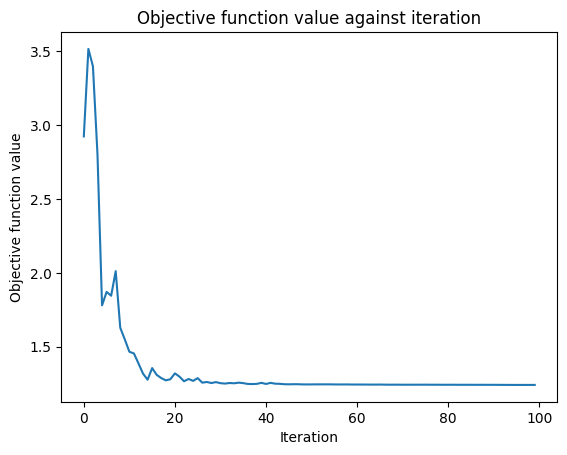

Time:
 [24.23063611984253, 23.64464807510376, 24.207449913024902, 23.995018005371094, 24.114983558654785, 24.512192010879517, 24.475197076797485, 24.826033353805542, 24.652270555496216, 23.79324460029602]
Precision:
 [0.86875, 0.8488888888888889, 0.9333333333333333, 0.9033333333333334, 0.9033333333333334, 0.9333333333333333, 0.8722222222222222, 0.8094276094276095, 0.9013888888888889, 0.8541666666666666]
Accuracy:
 [0.7666666666666667, 0.8333333333333334, 0.9333333333333333, 0.9, 0.9, 0.9333333333333333, 0.8666666666666667, 0.8, 0.9, 0.8333333333333334]
Recalls:
 [0.7848484848484848, 0.828956228956229, 0.9326599326599326, 0.9023569023569024, 0.9023569023569024, 0.9326599326599326, 0.8622895622895622, 0.8047138047138046, 0.8956228956228957, 0.8417508417508417]
F1:
 [0.7609561403508772, 0.8361895075853885, 0.9333333333333333, 0.9002506265664162, 0.9002506265664162, 0.9333333333333333, 0.8679633867276888, 0.8, 0.89923273657289, 0.8320802005012531]


In [51]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]//2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=1, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)

**Precision:**
 [0.86875, 0.8488888888888889, 0.9333333333333333, 0.9033333333333334, 0.9033333333333334, 0.9333333333333333, 0.8722222222222222, 0.8094276094276095, 0.9013888888888889, 0.8541666666666666]
**Mean Precision**
0.8828177609427609±0.038

**Accuracy:**
 [0.7666666666666667, 0.8333333333333334, 0.9333333333333333, 0.9, 0.9, 0.9333333333333333, 0.8666666666666667, 0.8, 0.9, 0.8333333333333334]
**Mean Accuracy**
0.8666666666666668±0.054

**Recall:**
 [0.7848484848484848, 0.828956228956229, 0.9326599326599326, 0.9023569023569024, 0.9023569023569024, 0.9326599326599326, 0.8622895622895622, 0.8047138047138046, 0.8956228956228957, 0.8417508417508417]
**Mean Recall**
 0.8688215488215487±0.05

**F1:**
 [0.7609561403508772, 0.8361895075853885, 0.9333333333333333, 0.9002506265664162, 0.9002506265664162, 0.9333333333333333, 0.8679633867276888, 0.8, 0.89923273657289, 0.8320802005012531]
**Mean F1**
0.8663589891537598±0.055

 **Time:**
 [24.23063611984253, 23.64464807510376, 24.207449913024902, 23.995018005371094, 24.114983558654785, 24.512192010879517, 24.475197076797485, 24.826033353805542, 24.652270555496216, 23.79324460029602]
**Mean Time**
24.245167326927184±0.3568428261996747

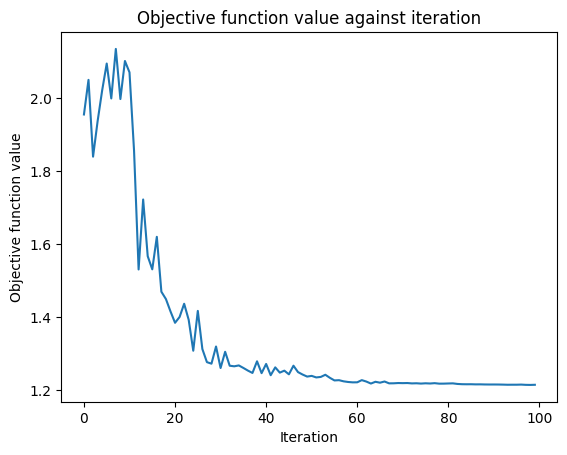

Precision:
 [0.8848484848484849, 0.9033333333333334, 0.8541666666666666, 0.9076923076923077, 0.9013888888888889, 0.7833333333333333, 0.9333333333333333, 0.8774410774410775, 0.9435897435897436, 0.9013888888888889]
Accuracy:
 [0.8666666666666667, 0.9, 0.8333333333333334, 0.8666666666666667, 0.9, 0.7666666666666667, 0.9333333333333333, 0.8666666666666667, 0.9333333333333333, 0.9]
Recalls:
 [0.865993265993266, 0.9023569023569024, 0.8417508417508417, 0.8787878787878788, 0.8956228956228957, 0.7744107744107743, 0.9326599326599326, 0.872053872053872, 0.9259259259259259, 0.8956228956228957]
F1:
 [0.8696296296296296, 0.9002506265664162, 0.8320802005012531, 0.863973063973064, 0.89923273657289, 0.7649122807017543, 0.9333333333333333, 0.8666666666666667, 0.9319444444444444, 0.89923273657289]
Time:
 [27.305135011672974, 27.549420595169067, 27.53006386756897, 26.988210678100586, 27.483885049819946, 26.938559532165527, 27.925341606140137, 27.762087106704712, 27.627483129501343, 27.050252199172974]


In [52]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]//2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.8848484848484849, 0.9033333333333334, 0.8541666666666666, 0.9076923076923077, 0.9013888888888889, 0.7833333333333333, 0.9333333333333333, 0.8774410774410775, 0.9435897435897436, 0.9013888888888889]
**Mean Precision**
0.8890516058016058±0.043

**Accuracy:**
 [0.8666666666666667, 0.9, 0.8333333333333334, 0.8666666666666667, 0.9, 0.7666666666666667, 0.9333333333333333, 0.8666666666666667, 0.9333333333333333, 0.9]
**Mean Accuracy**
0.8766666666666667±0.047

**Recall:**
 [0.865993265993266, 0.9023569023569024, 0.8417508417508417, 0.8787878787878788, 0.8956228956228957, 0.7744107744107743, 0.9326599326599326, 0.872053872053872, 0.9259259259259259, 0.8956228956228957]
**Mean Recall**
0.8785185185185185±0.043

**F1:**
 [0.8696296296296296, 0.9002506265664162, 0.8320802005012531, 0.863973063973064, 0.89923273657289, 0.7649122807017543, 0.9333333333333333, 0.8666666666666667, 0.9319444444444444, 0.89923273657289]
**Mean F1**
0.8761255718962342±0.048

**Time:**
 [27.305135011672974, 27.549420595169067, 27.53006386756897, 26.988210678100586, 27.483885049819946, 26.938559532165527, 27.925341606140137, 27.762087106704712, 27.627483129501343, 27.050252199172974]
**Mean Time**
27.416043877601624±0.3188049335842734

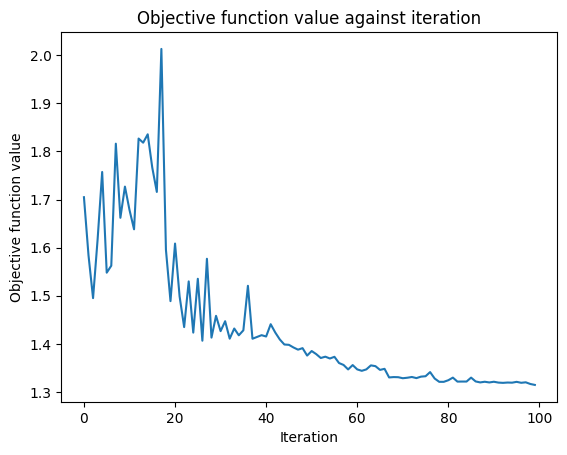

Precision:
 [0.9013888888888889, 0.9435897435897436, 0.9013888888888889, 0.9013888888888889, 0.9013888888888889, 0.8488888888888889, 0.8322344322344323, 0.9333333333333333, 0.9435897435897436, 0.6452380952380953]
Accuracy:
 [0.9, 0.9333333333333333, 0.9, 0.9, 0.9, 0.8333333333333334, 0.8, 0.9333333333333333, 0.9333333333333333, 0.6333333333333333]
Recalls:
 [0.8956228956228957, 0.9259259259259259, 0.8956228956228957, 0.8956228956228957, 0.8956228956228957, 0.828956228956229, 0.8114478114478114, 0.9326599326599326, 0.9259259259259259, 0.6464646464646464]
F1:
 [0.89923273657289, 0.9319444444444444, 0.89923273657289, 0.89923273657289, 0.89923273657289, 0.8361895075853885, 0.795959595959596, 0.9333333333333333, 0.9319444444444444, 0.6192668371696505]
Time:
 [30.525938749313354, 30.997385025024414, 30.196264028549194, 31.171586751937866, 30.879937887191772, 30.69284224510193, 30.60106348991394, 30.14577579498291, 30.41701102256775, 30.867523670196533]


In [53]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]//2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9013888888888889, 0.9435897435897436, 0.9013888888888889, 0.9013888888888889, 0.9013888888888889, 0.8488888888888889, 0.8322344322344323, 0.9333333333333333, 0.9435897435897436, 0.6452380952380953]
**Mean Precision**
0.8752429792429792±0.084
 
**Accuracy:**
 [0.9, 0.9333333333333333, 0.9, 0.9, 0.9, 0.8333333333333334, 0.8, 0.9333333333333333, 0.9333333333333333, 0.6333333333333333]
**Mean Accuracy**
0.8666666666666666±0.088

**Recall:**
 [0.8956228956228957, 0.9259259259259259, 0.8956228956228957, 0.8956228956228957, 0.8956228956228957, 0.828956228956229, 0.8114478114478114, 0.9326599326599326, 0.9259259259259259, 0.6464646464646464]
**Mean Recall**
0.8653872053872055±0.082

**F1:**
 [0.89923273657289, 0.9319444444444444, 0.89923273657289, 0.89923273657289, 0.89923273657289, 0.8361895075853885, 0.795959595959596, 0.9333333333333333, 0.9319444444444444, 0.6192668371696505]
**Mean F1**
0.8645569109228417±0.092

**Time:**
 [30.525938749313354, 30.997385025024414, 30.196264028549194, 31.171586751937866, 30.879937887191772, 30.69284224510193, 30.60106348991394, 30.14577579498291, 30.41701102256775, 30.867523670196533]
**Mean Time**
30.649532866477966±0.32045882271489706

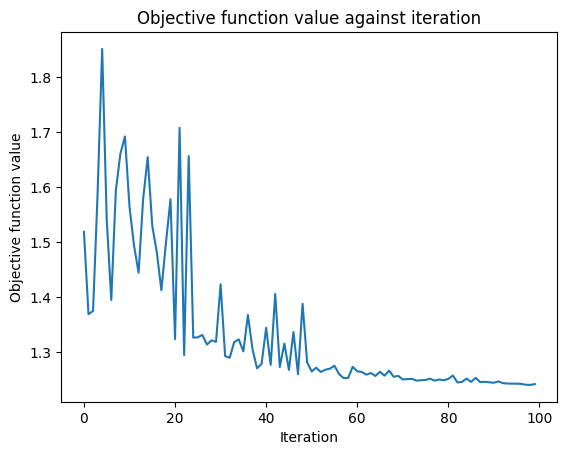

Precision:
 [0.9435897435897436, 0.9435897435897436, 0.8722222222222222, 0.8541666666666666, 0.8094276094276095, 0.817391304347826, 0.8322344322344323, 0.8294444444444444, 0.9033333333333334, 0.9013888888888889]
Accuracy:
 [0.9333333333333333, 0.9333333333333333, 0.8666666666666667, 0.8333333333333334, 0.8, 0.5333333333333333, 0.8, 0.7333333333333333, 0.9, 0.9]
Recalls:
 [0.9333333333333333, 0.9333333333333333, 0.8666666666666667, 0.8333333333333334, 0.8, 0.5333333333333333, 0.8, 0.7333333333333333, 0.9, 0.9]
F1:
 [0.9305555555555555, 0.9305555555555555, 0.8649038054072379, 0.8329156223893066, 0.8000000000000002, 0.4930555555555556, 0.797979797979798, 0.6949089557785211, 0.899749373433584, 0.8976982097186701]
Time:
 [33.66598558425903, 34.026570558547974, 33.117331743240356, 33.43788003921509, 34.19177794456482, 33.74501705169678, 34.07530498504639, 33.80152893066406, 34.05745553970337, 33.45007920265198]


In [47]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]//2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=4, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9435897435897436, 0.9435897435897436, 0.8722222222222222, 0.8541666666666666, 0.8094276094276095, 0.817391304347826, 0.8322344322344323, 0.8294444444444444, 0.9033333333333334, 0.9013888888888889]
**Mean Precision**
0.8706788388744912±0.048

**Accuracy:**
 [0.9333333333333333, 0.9333333333333333, 0.8666666666666667, 0.8333333333333334, 0.8, 0.5333333333333333, 0.8, 0.7333333333333333, 0.9, 0.9]
**Mean Accuracy**
0.8233333333333335±0.11

**Recall:**
 [0.9333333333333333, 0.9333333333333333, 0.8666666666666667, 0.8333333333333334, 0.8, 0.5333333333333333, 0.8, 0.7333333333333333, 0.9, 0.9]
**Mean Recall**
0.8233333333333335±0.114

**F1:**
 [0.9305555555555555, 0.9305555555555555, 0.8649038054072379, 0.8329156223893066, 0.8000000000000002, 0.4930555555555556, 0.797979797979798, 0.6949089557785211, 0.899749373433584, 0.8976982097186701]
**Mean F1**
0.8142322431373785±0.127

**Time:**
 [33.66598558425903, 34.026570558547974, 33.117331743240356, 33.43788003921509, 34.19177794456482, 33.74501705169678, 34.07530498504639, 33.80152893066406, 34.05745553970337, 33.45007920265198]
**Mean Time**
33.756893157958984±0.32694266658212484
